In [194]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import networkx as nx
from scipy.stats import skew, kurtosis
import scipy.stats as stats
import statistics
from itertools import product

In [75]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

years = range(2010, 2021)
labels = ['eu', 'gl', 'bc']
all_identifiers = list(years) + labels

results = []

for identifier in all_identifiers:
    # Load parquet files and .npy file
    clus_df = pd.read_parquet(f'clus_{identifier}.parquet')
    hub_aut_df = pd.read_parquet(f'hub_aut_{identifier}.parquet')
    bc_df = pd.read_parquet(f'dfz_s_{identifier}_bc.parquet')
    
    # Clustering coefficient stats
    clus_values = clus_df['Clustering_Coefficient']
    clus_stats = [
        clus_values.mean(),
        clus_values.std(),
        skew(clus_values),
        kurtosis(clus_values)
    ]
    
    # Random walk betweenness stats
    bc_values =  bc_df['betweenness']
    bc_stats = [
        bc_values.mean(),
        bc_values.std(),
        skew(bc_values),
        kurtosis(bc_values)
    ]
    
    # Hub and Authority scores stats
    hub_values = hub_aut_df['hub_score']
    aut_values = hub_aut_df['authority_score']
    
    hub_stats = [
        hub_values.mean(),
        hub_values.std(),
        skew(hub_values),
        kurtosis(hub_values)
    ]
    
    aut_stats = [
        aut_values.mean(),
        aut_values.std(),
        skew(aut_values),
        kurtosis(aut_values)
    ]
    
    # Combine all stats
    all_stats = clus_stats + bc_stats + hub_stats + aut_stats
    results.append(all_stats)

# Create MultiIndex columns
columns = pd.MultiIndex.from_tuples([
    ('Clus', 'Mean'),
    ('Clus', 'STD'),
    ('Clus', 'Skewness'),
    ('Clus', 'Kurtosis'),
    ('Bc', 'Mean'),
    ('Bc', 'STD'),
    ('Bc', 'Skewness'),
    ('Bc', 'Kurtosis'),
    ('Hub', 'Mean'),
    ('Hub', 'STD'),
    ('Hub', 'Skewness'),
    ('Hub', 'Kurtosis'),
    ('Aut', 'Mean'),
    ('Aut', 'STD'),
    ('Aut', 'Skewness'),
    ('Aut', 'Kurtosis'),
])

# Create the DataFrame
Stat_measures = pd.DataFrame(results, index=all_identifiers, columns=columns)

print(Stat_measures)


          Clus                                        Bc                       \
          Mean       STD  Skewness    Kurtosis      Mean       STD   Skewness   
2010  0.000043  0.000115  6.451332   53.634791  0.004140  0.022331  13.538299   
2011  0.000041  0.000110  6.888690   62.765315  0.004142  0.022532  13.841430   
2012  0.000040  0.000112  7.478378   77.120743  0.004169  0.022957  13.750595   
2013  0.000039  0.000109  7.451721   75.907610  0.004180  0.023000  13.560836   
2014  0.000037  0.000106  7.577373   78.445852  0.004243  0.023078  13.199938   
2015  0.000037  0.000107  7.856579   85.163195  0.004250  0.022931  13.130257   
2016  0.000036  0.000107  7.969087   86.466395  0.004256  0.022804  12.974910   
2017  0.000033  0.000099  8.324830   95.774828  0.004197  0.022661  13.403036   
2018  0.000031  0.000094  8.457422   98.724045  0.004166  0.022400  13.495295   
2019  0.000031  0.000092  8.327044   95.186402  0.004199  0.022594  13.413110   
2020  0.000032  0.000095  8.

In [76]:
results2 = []

for identifier in all_identifiers:
    df = pd.read_parquet(f'dfz_{identifier}.parquet')

     # --- Weights: flatten the matrix ---
    weights = df.values.flatten()
    
    weight_stats = [
        np.mean(weights),
        np.std(weights),
        skew(weights),
        kurtosis(weights)
    ]
    
    # --- Out-strength (sum of each row) ---
    out_strength = df.sum(axis=1).values
    
    out_strength_stats = [
        np.mean(out_strength),
        np.std(out_strength),
        skew(out_strength),
        kurtosis(out_strength)
    ]
    
    # --- In-strength (sum of each column) ---
    in_strength = df.sum(axis=0).values
    
    in_strength_stats = [
        np.mean(in_strength),
        np.std(in_strength),
        skew(in_strength),
        kurtosis(in_strength)
    ]
    
    # Combine stats
    all_stats = weight_stats + out_strength_stats + in_strength_stats
    results2.append(all_stats)

# Create MultiIndex for columns
columns = pd.MultiIndex.from_tuples([
    ('Weights', 'Mean'),
    ('Weights', 'STD'),
    ('Weights', 'Skewness'),
    ('Weights', 'Kurtosis'),
    ('Out-Strength', 'Mean'),
    ('Out-Strength', 'STD'),
    ('Out-Strength', 'Skewness'),
    ('Out-Strength', 'Kurtosis'),
    ('In-Strength', 'Mean'),
    ('In-Strength', 'STD'),
    ('In-Strength', 'Skewness'),
    ('In-Strength', 'Kurtosis')
])

# Create the final DataFrame
Stat_measures2 = pd.DataFrame(results2, index=all_identifiers, columns=columns)

print(Stat_measures2)

           Weights                                           Out-Strength  \
              Mean           STD    Skewness       Kurtosis          Mean   
2010  14305.878193  7.230692e+05  248.606810  101010.164705  2.951303e+07   
2011  15402.084839  7.902536e+05  247.528120   96807.417122  3.177450e+07   
2012  16112.917680  8.638350e+05  258.121477  102031.237292  3.324095e+07   
2013  16512.047016  9.069976e+05  264.891855  106194.655357  3.406435e+07   
2014  17009.871909  9.576418e+05  274.249578  113406.527895  3.509137e+07   
2015  16899.524246  9.819549e+05  287.132119  125231.431163  3.486372e+07   
2016  17071.267118  1.011206e+06  298.413401  136643.340016  3.521802e+07   
2017  17808.682728  1.080954e+06  302.910401  138054.360545  3.673931e+07   
2018  18579.888378  1.141044e+06  308.048354  142273.236637  3.833031e+07   
2019  18979.002630  1.183676e+06  313.220396  147091.367008  3.915368e+07   
2020  19327.383725  1.236173e+06  322.295550  154393.436177  3.987239e+07   

In [77]:
Stat_measures = pd.concat([Stat_measures, Stat_measures2], axis=1)
print(Stat_measures)

          Clus                                        Bc                       \
          Mean       STD  Skewness    Kurtosis      Mean       STD   Skewness   
2010  0.000043  0.000115  6.451332   53.634791  0.004140  0.022331  13.538299   
2011  0.000041  0.000110  6.888690   62.765315  0.004142  0.022532  13.841430   
2012  0.000040  0.000112  7.478378   77.120743  0.004169  0.022957  13.750595   
2013  0.000039  0.000109  7.451721   75.907610  0.004180  0.023000  13.560836   
2014  0.000037  0.000106  7.577373   78.445852  0.004243  0.023078  13.199938   
2015  0.000037  0.000107  7.856579   85.163195  0.004250  0.022931  13.130257   
2016  0.000036  0.000107  7.969087   86.466395  0.004256  0.022804  12.974910   
2017  0.000033  0.000099  8.324830   95.774828  0.004197  0.022661  13.403036   
2018  0.000031  0.000094  8.457422   98.724045  0.004166  0.022400  13.495295   
2019  0.000031  0.000092  8.327044   95.186402  0.004199  0.022594  13.413110   
2020  0.000032  0.000095  8.

In [79]:
Stat_measures.to_parquet('Stat_measures.parquet', index=False)

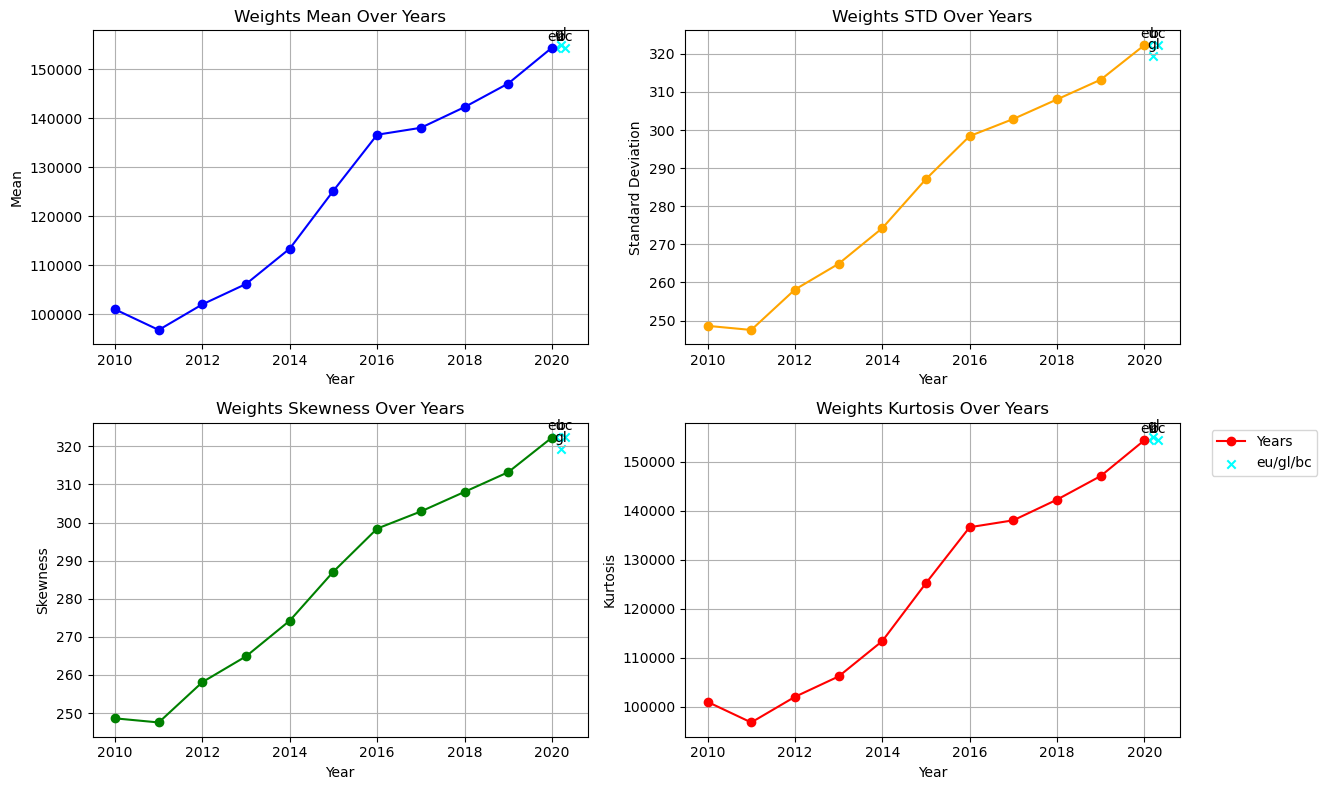

In [57]:
import matplotlib.pyplot as plt

# Years
years = list(range(2010, 2021))
# Add year label offsets for eu, gl, bc
years_extra = [2020 + 0.1, 2020 + 0.2, 2020 + 0.3]
labels_extra = ['eu', 'gl', 'bc']

# Weights data for Mean, STD, Skewness, Kurtosis
mean_weights = [
    101010.164705, 96807.417122, 102031.237292, 106194.655357,
    113406.527895, 125231.431163, 136643.340016, 138054.360545,
    142273.236637, 147091.367008, 154393.436177
]
mean_extra = [154353.956561, 155030.943901, 154364.108729]

std_weights = [
    248.606810, 247.528120, 258.121477, 264.891855,
    274.249578, 287.132119, 298.413401, 302.910401,
    308.048354, 313.220396, 322.295550
]
std_extra = [322.429955, 319.429623, 322.404283]

skewness_weights = [
    248.606810, 247.528120, 258.121477, 264.891855,
    274.249578, 287.132119, 298.413401, 302.910401,
    308.048354, 313.220396, 322.295550
]
skewness_extra = [322.429955, 319.429623, 322.404283]

kurtosis_weights = [
    101010.164705, 96807.417122, 102031.237292, 106194.655357,
    113406.527895, 125231.431163, 136643.340016, 138054.360545,
    142273.236637, 147091.367008, 154393.436177
]
kurtosis_extra = [154353.956561, 155030.943901, 154364.108729]

# Create subplots
plt.figure(figsize=(12, 8))

# Plot Mean
plt.subplot(2, 2, 1)
plt.plot(years, mean_weights, marker='o', linestyle='-', color='b', label='Years')
plt.scatter(years_extra, mean_extra, color='cyan', marker='x', label='eu/gl/bc')
for x, y, label in zip(years_extra, mean_extra, labels_extra):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.title('Weights Mean Over Years')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.grid(True)

# Plot Standard Deviation
plt.subplot(2, 2, 2)
plt.plot(years, std_weights, marker='o', linestyle='-', color='orange', label='Years')
plt.scatter(years_extra, std_extra, color='cyan', marker='x', label='eu/gl/bc')
for x, y, label in zip(years_extra, std_extra, labels_extra):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.title('Weights STD Over Years')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.grid(True)

# Plot Skewness
plt.subplot(2, 2, 3)
plt.plot(years, skewness_weights, marker='o', linestyle='-', color='green', label='Years')
plt.scatter(years_extra, skewness_extra, color='cyan', marker='x', label='eu/gl/bc')
for x, y, label in zip(years_extra, skewness_extra, labels_extra):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.title('Weights Skewness Over Years')
plt.xlabel('Year')
plt.ylabel('Skewness')
plt.grid(True)

# Plot Kurtosis
plt.subplot(2, 2, 4)
plt.plot(years, kurtosis_weights, marker='o', linestyle='-', color='red', label='Years')
plt.scatter(years_extra, kurtosis_extra, color='cyan', marker='x', label='eu/gl/bc')
for x, y, label in zip(years_extra, kurtosis_extra, labels_extra):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.title('Weights Kurtosis Over Years')
plt.xlabel('Year')
plt.ylabel('Kurtosis')
plt.grid(True)

plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


In [31]:
Z = {}
for year in range(2010, 2021):
    Z[year] = pd.read_parquet(f'dfz_{year}.parquet')

weights = {}
in_strength = {}
out_strength = {}

for year in range(2010, 2021):
    weights[year] = Z[year].values.flatten() 
    in_strength[year] = Z[year].sum(axis=0).values
    out_strength[year] = Z[year].sum(axis=1).values


In [113]:
clus = {}
hub_aut= {}

for year in range(2010, 2021):
    clus[year] = pd.read_parquet(f'clus_{year}.parquet') 
    hub_aut[year] = pd.read_parquet(f'hub_aut_{year}.parquet') 

clus_values = {}
hub_values = {}
aut_values = {}

for year in range(2010, 2021):
    clus_values[year] = clus[year]['Clustering_Coefficient']
    hub_values[year]=hub_aut[year]['hub_score']
    aut_values[year]=hub_aut[year]['authority_score']

In [129]:
def log_average_conditional(data_dict, num_bins=70, title='', output_prefix='output'):
    all_values = []
    for year_data in data_dict.values():
        vals = np.array(year_data)
        vals = vals[vals > 0]  # 🔹 Remove zero or negative values
        vals = np.log10(vals)    # 🔹 Now it's safe to log
        all_values.append(vals)
    all_values = np.concatenate(all_values)

 # 🔸 2. Bin edges
    bin_edges = np.linspace(np.min(all_values), np.max(all_values), num_bins + 1)

    # 🔸 3. Compute conditional matrices for each year-pair
    conditional_stack = []
    years = sorted(data_dict.keys())

    for y1, y2 in zip(years[:-1], years[1:]):
        x_vals = np.array(data_dict[y1])
        y_vals = np.array(data_dict[y2])

        mask = (x_vals > 0) & (y_vals > 0)
        x_log = np.log10(x_vals[mask])
        y_log = np.log10(y_vals[mask])

        joint_hist, _, _ = np.histogram2d(x_log, y_log, bins=[bin_edges, bin_edges])
        joint_prob = joint_hist / np.sum(joint_hist)

        # Marginal for x (year T)
        marginal_x = np.sum(joint_prob, axis=1)

        conditional_prob = np.zeros_like(joint_prob)
        for i in range(marginal_x.shape[0]):
            if marginal_x[i] > 0:
                conditional_prob[i, :] = joint_prob[i, :] / marginal_x[i]
                conditional_prob[i, :] /= np.sum(conditional_prob[i, :])  # Normalize

        conditional_stack.append(conditional_prob)

    # 🔸 4. Average conditional
    average_conditional = np.mean(conditional_stack, axis=0)

    # 🔸 5. Plot
    X, Y = np.meshgrid(bin_edges, bin_edges)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(X, Y, average_conditional.T, cmap='plasma')
    plt.xlabel('log(Value) at year T')
    plt.ylabel('log(Value) at year T+1')
    plt.colorbar(label='Avg. Conditional Density P(y|x)')
    plt.title(f'Average Conditional Density:{title}')
    png_path = f"{output_prefix}.png"
    plt.savefig(png_path, dpi=300)
    plt.show()
    plt.close()

    # 🔸 6. Save to Parquet
    # Convert matrix to DataFrame with bin labels
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    df = pd.DataFrame(average_conditional, columns=bin_centers, index=bin_centers)
    df.index.name = 'log(Value at year T)'
    df.columns.name = 'log(Value at year T+1)'

    parquet_path = f"{output_prefix}.parquet"
    df.to_parquet(parquet_path)

    print(f"Saved PNG: {png_path}")
    print(f"Saved Parquet: {parquet_path}")

    


    







    

In [ ]:
def average_conditional(data_dict, num_bins=70, title='', output_prefix='output', plot_value_max=None):
    all_values = []
    for year_data in data_dict.values():
        vals = np.array(year_data)
        all_values.append(vals)
    all_values = np.concatenate(all_values)

 # 🔸 2. Bin edges
    bin_edges = np.linspace(np.min(all_values), np.max(all_values), num_bins + 1)

    # 🔸 3. Compute conditional matrices for each year-pair
    conditional_stack = []
    years = sorted(data_dict.keys())

    for y1, y2 in zip(years[:-1], years[1:]):
        x_vals = np.array(data_dict[y1])
        y_vals = np.array(data_dict[y2])

        joint_hist, _, _ = np.histogram2d(x_vals, y_vals, bins=[bin_edges, bin_edges])
        joint_prob = joint_hist / np.sum(joint_hist)

        # Marginal for x (year T)
        marginal_x = np.sum(joint_prob, axis=1)

        conditional_prob = np.zeros_like(joint_prob)
        for i in range(marginal_x.shape[0]):
            if marginal_x[i] > 0:
                conditional_prob[i, :] = joint_prob[i, :] / marginal_x[i]
                conditional_prob[i, :] /= np.sum(conditional_prob[i, :])  # Normalize

        conditional_stack.append(conditional_prob)

    # 🔸 4. Average conditional
    average_conditional = np.mean(conditional_stack, axis=0)

    # 🔸 5. Plot
    # 🔹 Override plotting range if requested
    plot_edges = bin_edges
    if plot_value_max is not None:
        plot_edges = np.linspace(0, plot_value_max, num_bins + 1)

    X, Y = np.meshgrid(plot_edges, plot_edges)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(X, Y, average_conditional.T, cmap='plasma', shading='auto')
    plt.xlabel('Value at year T')
    plt.ylabel('Value at year T+1')
    plt.colorbar(label='Avg. Conditional Density P(y|x)')
    plt.title(f'Average Conditional Density:{title}')
    png_path = f"{output_prefix}.png"
    plt.savefig(png_path, dpi=300)
    plt.show()
    plt.close()

    # 🔸 6. Save to Parquet
    # Convert matrix to DataFrame with bin labels
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    df = pd.DataFrame(average_conditional, columns=bin_centers, index=bin_centers)
    df.index.name = 'Value at year T'
    df.columns.name = 'Value at year T+1'

    parquet_path = f"{output_prefix}.parquet"
    df.to_parquet(parquet_path)

    print(f"Saved PNG: {png_path}")
    print(f"Saved Parquet: {parquet_path}")

In [ ]:
def symlog_average_conditional(data_dict, num_bins=70, title='', output_prefix='output', linthresh=1e-2):
    # 🔹 1. Collect all values (including zeros) to define global bin edges
    all_values = []
    for year_data in data_dict.values():
        vals = np.array(year_data)
        all_values.append(vals)
    all_values = np.concatenate(all_values)

    # 🔸 2. Bin edges over full range
    bin_edges = np.linspace(np.min(all_values), np.max(all_values), num_bins + 1)

    # 🔸 3. Compute conditional matrices for each year-pair
    conditional_stack = []
    years = sorted(data_dict.keys())

    for y1, y2 in zip(years[:-1], years[1:]):
        x_vals = np.array(data_dict[y1])
        y_vals = np.array(data_dict[y2])

        # Mask finite values only (to avoid NaNs or inf)
        mask = np.isfinite(x_vals) & np.isfinite(y_vals)
        x_vals = x_vals[mask]
        y_vals = y_vals[mask]

        joint_hist, _, _ = np.histogram2d(x_vals, y_vals, bins=[bin_edges, bin_edges])
        joint_prob = joint_hist / np.sum(joint_hist)

        marginal_x = np.sum(joint_prob, axis=1)

        conditional_prob = np.zeros_like(joint_prob)
        for i in range(marginal_x.shape[0]):
            if marginal_x[i] > 0:
                conditional_prob[i, :] = joint_prob[i, :] / marginal_x[i]
                conditional_prob[i, :] /= np.sum(conditional_prob[i, :])  # Normalize

        conditional_stack.append(conditional_prob)

    # 🔸 4. Average conditional
    average_conditional = np.mean(conditional_stack, axis=0)

    # 🔸 5. Plot with symlog scale
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    X, Y = np.meshgrid(bin_centers, bin_centers)

    plt.figure(figsize=(8, 6))
    pcm = plt.pcolormesh(X, Y, average_conditional.T, cmap='plasma', shading='auto')
    plt.xscale('symlog', linthresh=linthresh)
    plt.yscale('symlog', linthresh=linthresh)
    plt.xlabel('Value at year T')
    plt.ylabel('Value at year T+1')
    plt.colorbar(pcm, label='Avg. Conditional Density P(y|x)')
    plt.title(f'Average Conditional Density: {title}')
    plt.tight_layout()
    png_path = f"{output_prefix}.png"
    plt.savefig(png_path, dpi=300)
    plt.show()
    plt.close()

    # 🔸 6. Save to Parquet with bin centers
    df = pd.DataFrame(average_conditional, columns=bin_centers, index=bin_centers)
    df.index.name = 'Value at year T'
    df.columns.name = 'Value at year T+1'

    parquet_path = f"{output_prefix}.parquet"
    df.to_parquet(parquet_path)

    print(f"Saved PNG: {png_path}")
    print(f"Saved Parquet: {parquet_path}")

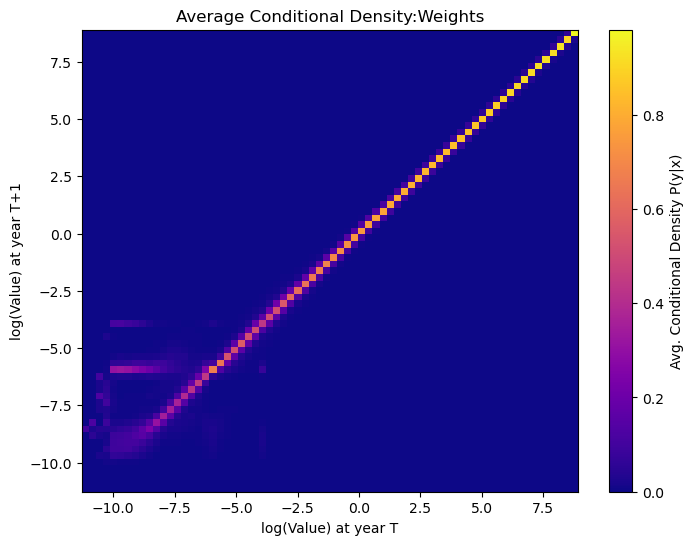

Saved PNG: avg_condit_weights.png
Saved Parquet: avg_condit_weights.parquet


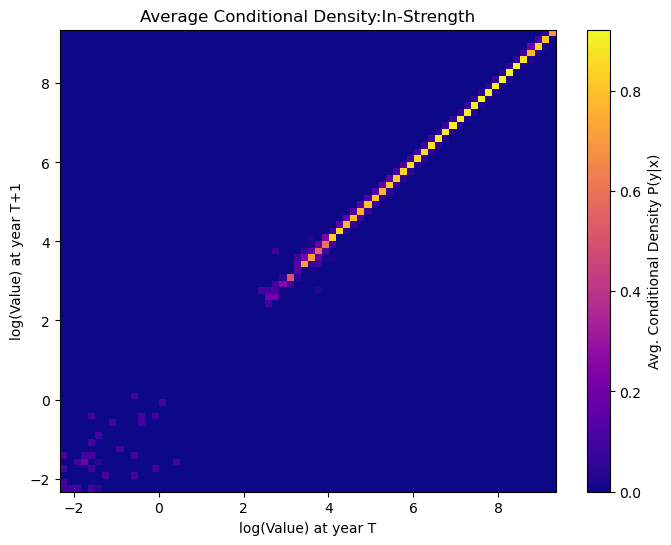

Saved PNG: avg_condit_in.png
Saved Parquet: avg_condit_in.parquet


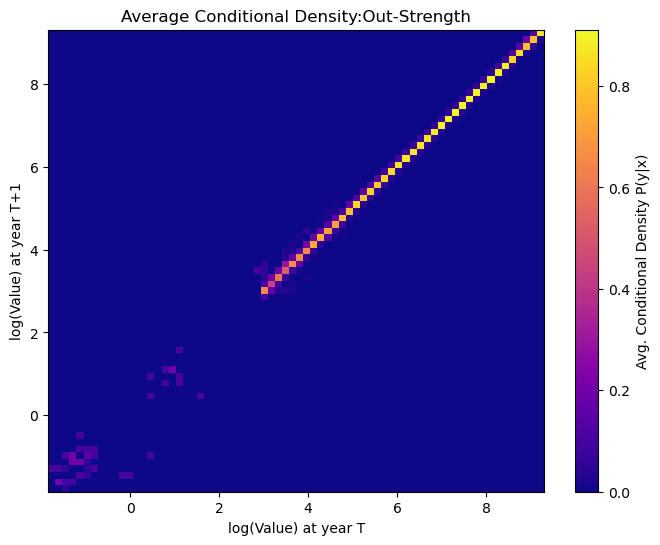

Saved PNG: avg_condit_out.png
Saved Parquet: avg_condit_out.parquet


In [104]:
log_average_conditional(weights, title='Weights', output_prefix='avg_condit_weights')
log_average_conditional(in_strength, title='In-Strength', output_prefix='avg_condit_in')
log_average_conditional(out_strength, title='Out-Strength', output_prefix='avg_condit_out')

In [82]:
log_average_conditional(clus_values, title='Clustering', output_prefix='avg_condit_clus')
average_conditional(hub_values, title='Hub', output_prefix='avg_condit_hub')
average_conditional(aut_values, title='Authorities', output_prefix='avg_condit_aut')

TypeError: 'numpy.ndarray' object is not callable

In [115]:
bc = {}
for year in range(2010, 2021):
    bc[year] = pd.read_parquet(f'dfz_s_{year}_bc.parquet')

bc_values = {}
for year in range(2010, 2021):
    bc_values[year] = bc[year]['betweenness']


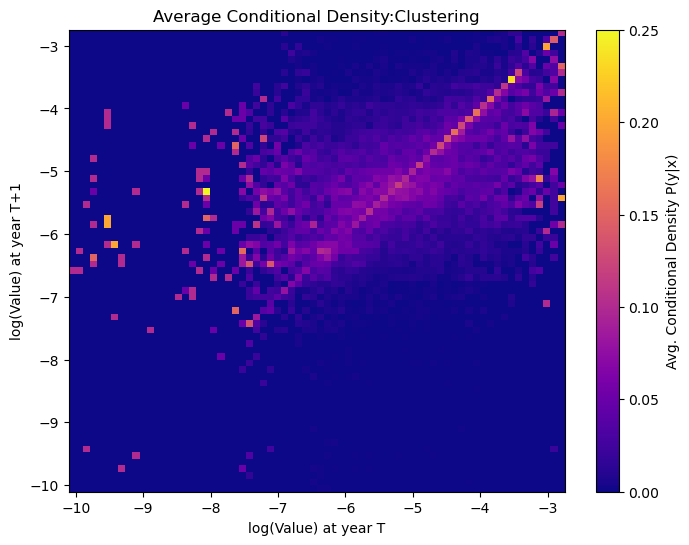

Saved PNG: avg_condit_clus.png
Saved Parquet: avg_condit_clus.parquet


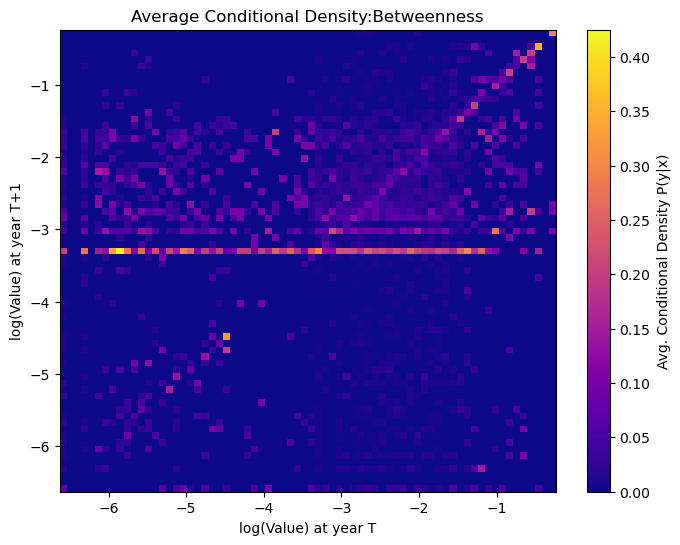

Saved PNG: avg_condit_bc.png
Saved Parquet: avg_condit_bc.parquet


In [116]:
log_average_conditional(clus_values, title='Clustering', output_prefix='avg_condit_clus')
log_average_conditional(bc_values, title='Betweenness', output_prefix='avg_condit_bc')

In [141]:
nonzero_data = [x for x in bc_values[2013] if x != 0]
print(statistics.median(nonzero_data))

0.0012412401389059486


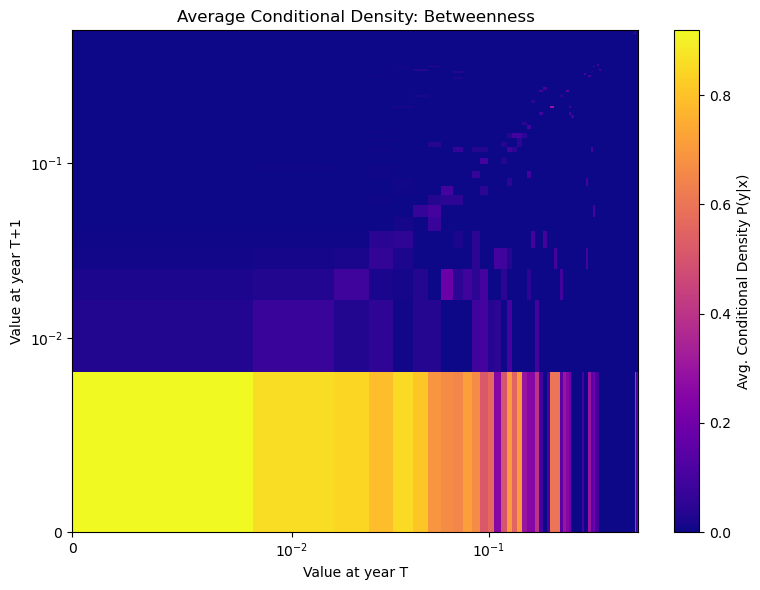

Saved PNG: symlog_avg_condit_bc.png
Saved Parquet: symlog_avg_condit_bc.parquet


In [156]:
symlog_average_conditional(bc_values, 70, title='Betweenness', output_prefix='symlog_avg_condit_bc')

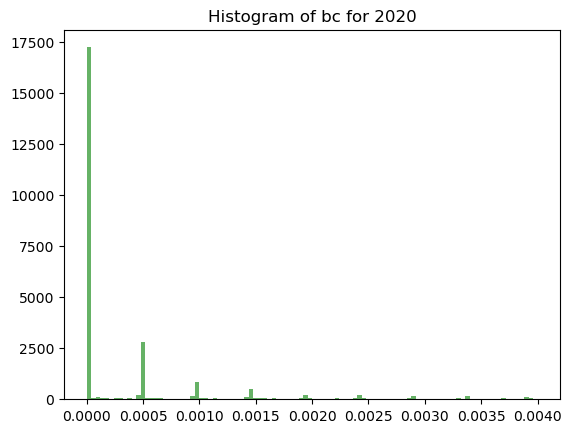

In [165]:
data = bc_values[2020]
#log_data = np.log10(data)

plt.hist(data, bins=100, range=(0, 0.004), density=True, alpha=0.6, color='g')
plt.title('Histogram of bc for 2020')
plt.show()

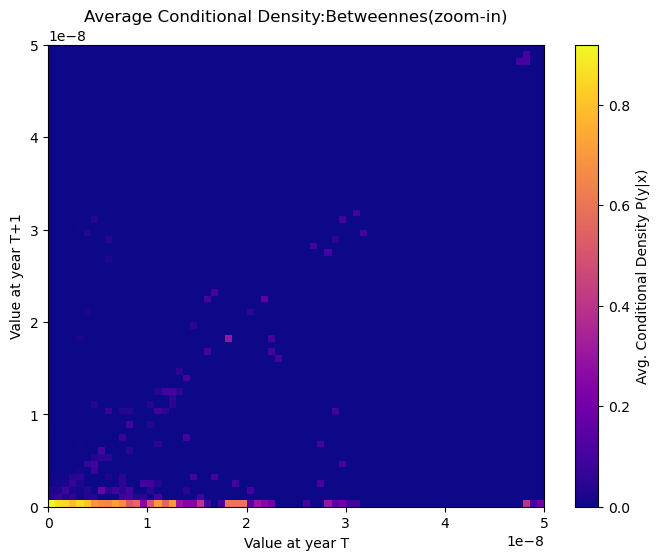

Saved PNG: avg_condit_limit_bc.png
Saved Parquet: avg_condit_limit_bc.parquet


In [174]:
average_conditional(bc_values, title='Betweennes(zoom-in)', output_prefix='avg_condit_limit_bc', plot_value_max=0.00000005)

In [186]:
#transition probability
years = list(range(2010, 2021))
#K = 10       # Number of quantile classes
#tau = 1      # Time lag
#omega = 1    # Window around diagonal

def quantile_class(series, K):
    return pd.qcut(series, q=K, labels=False, duplicates='drop')

def compute_transition_matrix(dict, name='', K=100, tau=1):
    counts = np.zeros((K, K))
    for t in range(tau, len(years)):
        year_t = years[t]
        year_t_tau = years[t - tau]

        x_t = dict[year_t][name]
        x_t_tau = dict[year_t_tau][name]

        qc_t = quantile_class(x_t, K)
        qc_t_tau = quantile_class(x_t_tau, K)

        for i, j in zip(qc_t_tau, qc_t):
            counts[int(i), int(j)] += 1

    # Normalize to get transition probabilities
    with np.errstate(divide='ignore', invalid='ignore'):
        P = counts / counts.sum(axis=1, keepdims=True)
        P[np.isnan(P)] = 0  # Replace NaNs from 0/0 with 0
    return P

def compute_M_tau_omega(P, K=100, omega=1):
    return (1 / K) * sum(
        P[h, l]
        for h, l in product(range(K), repeat=2)
        if abs(h - l) <= omega
    )
        

In [195]:
clus_trans_matrix = compute_transition_matrix(clus, name='Clustering_Coefficient', K=100, tau=1)
M_clus = compute_M_tau_omega(clus_trans_matrix, K=100, omega=1)
print(M_clus)

0.10846190476190457


In [199]:
clus_trans_matrix2 = compute_transition_matrix(clus, name='Clustering_Coefficient', K=5, tau=1)
M_clus2 = compute_M_tau_omega(clus_trans_matrix2, K=5, omega=1)
print(M_clus2)

0.6812756529302523


In [202]:
bc_trans_matrix = compute_transition_matrix(bc, name='betweenness', K=100, tau=1)
bc_M = compute_M_tau_omega(bc_trans_matrix, K=100, omega=1)
print(bc_M)

0.045420928084002846


In [205]:
hub_trans_matrix = compute_transition_matrix(hub_aut, name='hub_score', K=100, tau=1)
hub_M = compute_M_tau_omega(hub_trans_matrix, K=100, omega=1)
print(hub_M)

0.7207547619047614


In [206]:
aut_trans_matrix = compute_transition_matrix(hub_aut, name='authority_score', K=100, tau=1)
aut_M = compute_M_tau_omega(aut_trans_matrix, K=100, omega=1)
print(aut_M)

0.6876190476190478


In [221]:
nodes = clus[2020]['Node']
in_strength_with_node = {}
for year in years:
    in_strength_with_node[year] = pd.DataFrame({
    'Node': nodes,
    'in_strength': in_strength[year]
    })

out_strength_with_node = {}
for year in years:
    out_strength_with_node[year] = pd.DataFrame({
    'Node': nodes,
    'out_strength': out_strength[year]
    })


In [222]:
in_trans_matrix = compute_transition_matrix(in_strength_with_node, name='in_strength', K=100, tau=1)
in_M = compute_M_tau_omega(in_trans_matrix, K=100, omega=1)
print(in_M)

0.9359357142857154


In [223]:
out_trans_matrix = compute_transition_matrix(out_strength_with_node, name='out_strength', K=100, tau=1)
out_M = compute_M_tau_omega(out_trans_matrix, K=100, omega=1)
print(out_M)

0.9381071428571437


In [230]:

M = pd.DataFrame({
    'Statistics': ['clus', 'bc', 'hub', 'aut', 'in', 'out' ],
     'M(τ=1, ω=1, K=100)': [M_clus, bc_M, hub_M, aut_M, in_M, out_M]
    })
print(M)

M.to_parquet('M_values.parquet')

  Statistics  M(τ=1, ω=1, K=100)
0       clus            0.108462
1         bc            0.045421
2        hub            0.720755
3        aut            0.687619
4         in            0.935936
5        out            0.938107
